In [1]:
from PIL import Image
import os
import numpy as np

In [18]:
DATA_PATH = './CelebA-20180401T103208Z-016/CelebA/Img/small_set/'
DATA_PATH2 = './CelebA-20180401T103208Z-016/CelebA/Img/small_set_centre_crop/'
names  = os.listdir(DATA_PATH)
size = (64, 64)
for name in names:
    im = Image.open(DATA_PATH+name)
    width, height = im.size   # Get dimensions
    new_width = width*0.6
    new_height= height*0.6

    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2

    im = im.crop((left, top, right, bottom))
    im =im.resize(size, Image.ANTIALIAS)
    im.save(DATA_PATH2+name)

In [46]:
a = []
for name in names:
    im = Image.open(DATA_PATH2+name)
    imx = np.array(im)
    imx = imx.reshape(-1)
    a.append(imx)
    
a =np.asarray(a)
print(a.shape)
np.savetxt('images.txt', a)

(999, 12288)


In [47]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(a)
print(pca.explained_variance_ratio_)

[0.23813807 0.10428095]


In [49]:
reduced_a = pca.transform(a)
reduced_a.shape

(999, 2)

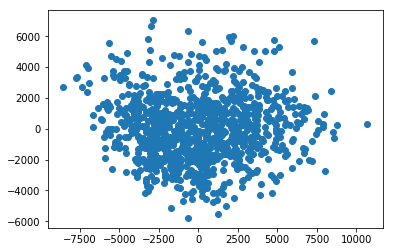

In [73]:
from matplotlib import pyplot as plt
x = reduced_a[:,:1]
y = reduced_a[:,1:2]
#print(y)
plt.scatter(x,y)
plt.show()